In [196]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import scipy

from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
from cycler import cycler


In [197]:
dic = os.getcwd() + "/data/layout_data.xlsx"

wind_data = pd.read_excel(dic)
wind_data.rename(columns={'Speed at hh - 160':'160','Speed at hh - 105':'105','Speed at hh - 120':'120','Speed at hh - 134':'134'},inplace=True)
wind_data.dropna(inplace=True)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)
wind_data

,160,105,120,134,Mean Direction
0,12.5,11.7,11.9,12.1,230.0
1,13.3,12.4,12.7,12.9,230.0
2,13.3,12.4,12.7,12.9,230.0
3,14.0,13.2,13.4,13.7,230.0
4,14.0,13.2,13.4,13.7,230.0
...,...,...,...,...,...
8728,17.8,16.8,17.2,17.5,250.0
8729,15.4,14.6,14.9,15.2,290.0
8730,13.1,12.4,12.7,12.9,310.0
8731,11.6,11.0,11.2,11.4,310.0


In [198]:
np.count_nonzero(wind_data[wind_data['160'] == 0].index)


366

In [182]:
wind_data.drop(wind_data[wind_data['160'] == 0].index,inplace=True)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

In [183]:
np.count_nonzero(wind_data[wind_data['160'] == 0].index)

0

In [184]:
int(366*0.199)

72

In [185]:
# 1/8
k1 = int(366*0.199)
x = np.zeros(shape=[k1,5])
x[0:,4] = 0
test = pd.DataFrame(data=x[0:,0:],index=range(0,k1),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#2/8
k2 = int(366*0.0909)
x = np.zeros(shape=[k2,5])
x[0:,4] = 30
test = pd.DataFrame(data=x[0:,0:],index=range(0,k2),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#3/8
k3 = int(366*0.0783)
x = np.zeros(shape=[k3,5])
x[0:,4] = 80
test = pd.DataFrame(data=x[0:,0:],index=range(0,k3),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#4/8
k4 = int(366*0.0234)
x = np.zeros(shape=[k4,5])
x[0:,4] = 130
test = pd.DataFrame(data=x[0:,0:],index=range(0,k4),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#5/8
k5 = int(366*0.1912)
x = np.zeros(shape=[k5,5])
x[0:,4] = 170
test = pd.DataFrame(data=x[0:,0:],index=range(0,k5),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#6/8
k6 = int(366*0.1917)
x = np.zeros(shape=[k6,5])
x[0:,4] = 220
test = pd.DataFrame(data=x[0:,0:],index=range(0,k6),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#7/8
k7 = int(366*0.1281)
x = np.zeros(shape=[k7,5])
x[0:,4] = 260
test = pd.DataFrame(data=x[0:,0:],index=range(0,k7),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

#8/8
k8 = int(366*0.1028)
x = np.zeros(shape=[k8,5])
x[0:,4] = 310
test = pd.DataFrame(data=x[0:,0:],index=range(0,k8),columns=wind_data.columns.array)

wind_data = wind_data._append(test)
wind_data.reset_index(inplace=True)
wind_data.drop(columns={'index'},inplace=True)

wind_data


,160,105,120,134,Mean Direction
0,12.5,11.7,11.9,12.1,230.0
1,13.3,12.4,12.7,12.9,230.0
2,13.3,12.4,12.7,12.9,230.0
3,14.0,13.2,13.4,13.7,230.0
4,14.0,13.2,13.4,13.7,230.0
...,...,...,...,...,...
8725,0.0,0.0,0.0,0.0,310.0
8726,0.0,0.0,0.0,0.0,310.0
8727,0.0,0.0,0.0,0.0,310.0
8728,0.0,0.0,0.0,0.0,310.0


In [186]:
np.count_nonzero(wind_data[wind_data['160'] == 0].index)

363

In [187]:
wind_data.columns.array

<NumpyExtensionArray>
['160', '105', '120', '134', 'Mean Direction']
Length: 5, dtype: object

In [188]:
columns = wind_data.columns.array
arr_height = columns[[0,1,2,3]]
arr_height

<NumpyExtensionArray>
['160', '105', '120', '134']
Length: 4, dtype: object

In [189]:
arr_shape = np.ndarray(shape=(4,8))

arr_scale =  np.ndarray(shape=(4,8))

In [190]:
def visualisation(x,height,i):
    sns.set_theme()
    sns.set_style(rc = {'axes.facecolor': 'w'})


    plt.rc('lines', linewidth=1.5, linestyle='-')
    plt.rcParams['axes.prop_cycle'] = cycler(color=['#20202077',
                                                '#029020dd',
                                                '#FF8C00dd',
                                                '#ff00ffcc',
                                                '#2020ffdd']
                                                # alpha=[1, 1, 1, 1, .7]
                                            )

    x.summary(plot=True, lw=2)

    plt.gca().set_axisbelow(True)
    plt.gca().grid(color='#cccccccc', linestyle=':', 
                linewidth=1.5, which='both')
    #plt.gca().plot(color='blue')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.plot(color='blue')
    plt.savefig('%s/figures/fig_%s_%i.png' % (os.getcwd(),height,i))

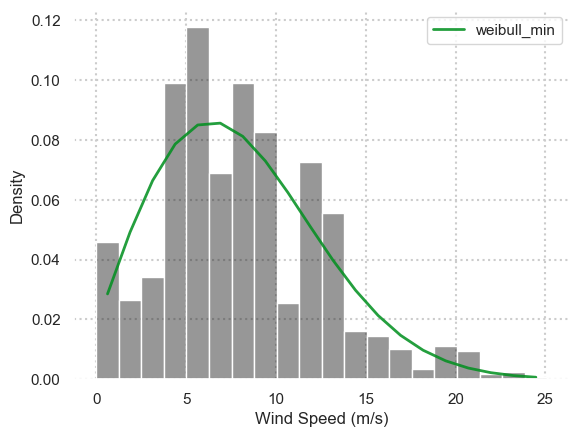

In [191]:
i = 0
for height in arr_height:

        # 1/8, bins=35
        df = wind_data[((wind_data['Mean Direction']<22.5))]
        df_2 = wind_data[(wind_data['Mean Direction'] > 337.5)]

        wind_np_1 = df[height].to_numpy()
        wind_np_2 = df_2[height].to_numpy()
        wind_np = np.append(wind_np_1,wind_np_2)

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,1)
        arr_scale[i][0] = f.fitted_param['weibull_min'][0]
        arr_shape[i][0] = f.fitted_param['weibull_min'][2]
        

        # 2/8, bins=24
        df = wind_data[(wind_data['Mean Direction'] >22.5) & (wind_data['Mean Direction'] <=67.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,2)
        arr_scale[i][1] = f.fitted_param['weibull_min'][0]
        arr_shape[i][1] = f.fitted_param['weibull_min'][2]

        # 3/8, bins=21 # 67.5 - 112.5
        df = wind_data[(wind_data['Mean Direction'] >67.5) & (wind_data['Mean Direction'] <=112.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,3)
        arr_scale[i][2] = f.fitted_param['weibull_min'][0]
        arr_shape[i][2] = f.fitted_param['weibull_min'][2]

        # 4/8, bins=20 # 112.5 - 157.5
        df = wind_data[(wind_data['Mean Direction'] >112.5) & (wind_data['Mean Direction'] <=157.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,4)
        arr_scale[i][3] = f.fitted_param['weibull_min'][0]
        arr_shape[i][3] = f.fitted_param['weibull_min'][2]

        # 5/8, bins= 20 # 157.5 - 202.5
        df = wind_data[(wind_data['Mean Direction'] >157.5) & (wind_data['Mean Direction'] <=202.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,5)
        arr_scale[i][4] = f.fitted_param['weibull_min'][0]
        arr_shape[i][4] = f.fitted_param['weibull_min'][2]

        # 6/8,bins=20 # 202.5 - 247.5
        df = wind_data[(wind_data['Mean Direction'] >202.5) & (wind_data['Mean Direction'] <=247.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,6)
        arr_scale[i][5] = f.fitted_param['weibull_min'][0]
        arr_shape[i][5] = f.fitted_param['weibull_min'][2]
        
        #  7/8,bins=42 # 247.5 - 292.5
        df = wind_data[(wind_data['Mean Direction'] >247.5) & (wind_data['Mean Direction'] <=292.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,7)
        arr_scale[i][6] = f.fitted_param['weibull_min'][0]
        arr_shape[i][6] = f.fitted_param['weibull_min'][2]

        # 8/8, bins=30 # 
        df = wind_data[(wind_data['Mean Direction'] >292.5) & (wind_data['Mean Direction'] <=337.5)]
        wind_np = df[height].to_numpy()

        f = Fitter(wind_np, distributions=['weibull_min'],bins=20)
        f.fit()
        visualisation(f,height,8)
        arr_scale[i][7] = f.fitted_param['weibull_min'][0]
        arr_shape[i][7] = f.fitted_param['weibull_min'][2]

        i=i+1

In [192]:
arr_height

<NumpyExtensionArray>
['160', '105', '120', '134']
Length: 4, dtype: object

In [193]:
arr_scale

array([[1.98858114, 2.10301252, 1.41892377, 1.51283759, 3.47763157,
        2.62378506, 2.13036192, 2.07866741],
       [2.00128335, 2.12193848, 1.45220505, 1.51771072, 3.46489199,
        2.63674739, 2.14540159, 2.08754213],
       [1.99374139, 2.10945462, 1.44753857, 1.50567927, 3.46670555,
        2.63776657, 2.14337357, 2.08122908],
       [1.99585496, 2.1156456 , 1.41457213, 1.51938988, 3.46766853,
        2.63825493, 2.14447184, 2.08339632]])

In [194]:
arr_shape

array([[ 9.37653387,  8.84496663,  5.09682285,  6.56691348, 21.98818967,
        17.24846353, 13.02811246, 10.47981514],
       [ 8.86032637,  8.36592884,  4.90429734,  6.21235477, 20.68123672,
        16.29415953, 12.32018001,  9.90131966],
       [ 9.02122784,  8.51057671,  4.99907933,  6.31033012, 21.12253409,
        16.63817057, 12.57394241, 10.08670783],
       [ 9.17429771,  8.65229028,  4.95968314,  6.44597986, 21.46346078,
        16.91027681, 12.77438407, 10.25331939]])

## Output

In [86]:

        # 0: '160', 1:'105', 2:'120', 3:'134'
        # arr_scale[0] acceses therefore turbine with height 60.
        arr_scale = [[3.92121946e-01, 1.94889903e+00, 1.20786851e+00, 1.35592443e+00,
        2.93133805e+00, 2.29210661e+00, 2.00461918e+00, 1.71882566e+00],
       [2.95497141e-01, 1.94379540e+00, 1.21150870e+00, 1.34817449e+00,
        2.93869639e+00, 2.29808800e+00, 2.00675576e+00, 1.72250535e+00],
       [2.95332333e-01, 1.91446417e+00, 1.23353366e+00, 1.31454037e+00,
        2.92995831e+00, 2.28945118e+00, 1.99018300e+00, 1.73384782e+00],
       [5.97073335e-01, 5.05534606e+01, 2.52881099e-01, 6.71417823e+00,
        1.59188532e+07, 1.57966673e-01, 8.33225582e-01, 7.57076615e-01]]

        arr_shape = [[7.90580189e-01, 7.40325048e+00, 3.96014434e+00, 5.49453262e+00,
        1.66388730e+01, 1.35633490e+01, 1.10289047e+01, 7.61278307e+00],
       [1.35106671e+00, 7.55726665e+00, 4.06287200e+00, 5.59721331e+00,
        1.70268656e+01, 1.38806991e+01, 1.12803292e+01, 7.79636699e+00],
       [1.37307509e+00, 7.55943584e+00, 4.19680339e+00, 5.55732389e+00,
        1.72479706e+01, 1.40567206e+01, 1.13685356e+01, 7.96510521e+00],
       [1.82029111e+02, 4.83799253e+02, 2.07409832e+01, 6.76282397e+01,
        1.50263579e+08, 9.90614578e+00, 1.93797057e+01, 1.64789570e+01]]